# Reading Images and it's resolution


The resolution of image is : (256, 256, 3)


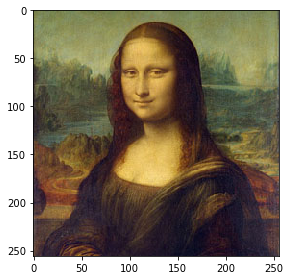

In [2]:
from skimage import io 
monalisa_image=io.imread('ImageProcessingImage/images/monalisa.jpg')
io.imshow(monalisa_image)
print("The resolution of image is :",monalisa_image.shape)

# Flatting img into pixel saving into xlsx file

In [1]:
from skimage import io 
import pandas as pd
img=io.imread('ImageProcessingImage/images/monalisa.jpg')
df=pd.DataFrame(img.flatten())
filePath='pixel_values1.xlsx'
df.to_excel(filePath,index=False)


# Converting color Space

## RGB to HSV,grey and vice-versa

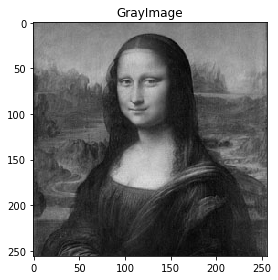

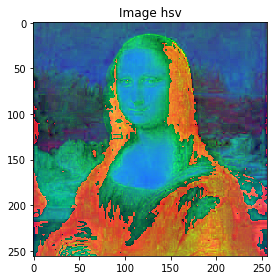

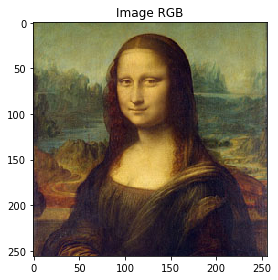

In [29]:
from skimage import io
from skimage import color 
from pylab import *

img=io.imread('ImageProcessingImage/images/monalisa.jpg')
img_grey=color.rgb2gray(img)
img_hsv=color.rgb2hsv(img)
img_RGB=color.hsv2rgb(img_hsv)
figure(0)
title("GrayImage")
io.imshow(img_grey)
figure(1)
title("Image hsv")
io.imshow(img_hsv)
figure(2)
title("Image RGB")
io.imshow(img_RGB)



# Creating basic drawings on image


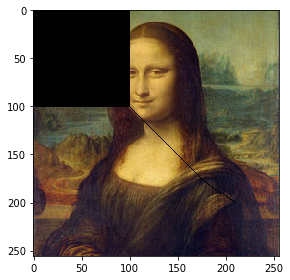

In [30]:
from skimage import io 
from skimage import draw 
img=io.imread('ImageProcessingImage/images/monalisa.jpg')
# x,y=draw.line(0,0,200,200)
# img[x,y]=0
def rectangle(x,y,w,h):
    rr, cc=[x,x+w,x+w,x],[y,y,y+h,y+h]
    return (draw.polygon(rr,cc))
rr,cc=rectangle(0,0,100,100)
x, y = draw.bezier_curve(0,0, 180, 180, 200,210,100) #Draw Bezier curve
img[x, y] = 1
img[rr,cc]=1
io.imshow(img)

# ROATATING,SHIFTING,Scaling IMages


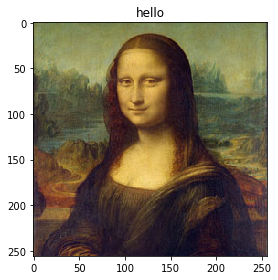

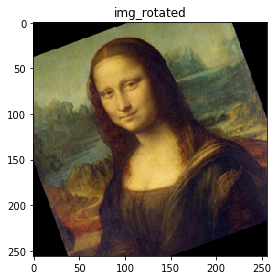

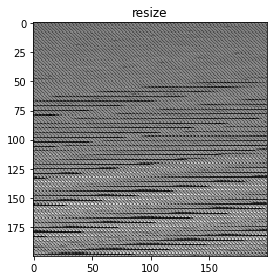

In [45]:
from skimage import io
from skimage.transform import rotate ,resize
from pylab import *
img=io.imread('ImageProcessingImage/images/monalisa.jpg')
img_rot=rotate(img,20)
figure(0)
title("hello")
io.imshow(img)
figure(1)
title("img_rotated")
io.imshow(img_rot)
img_resize=resize(img,(200,200))
io.imsave('resize.jpg',img_resize)
figure(2)
title("resize")
io.imshow(img_resize)

# Determining structural identity

In [46]:
from skimage import io
from skimage.metrics import structural_similarity as ssim
img_original=io.imread("ImageProcessingImage/images/monalisa.jpg")
img_modified=io.imread("rot.jpg")
ssim_original = ssim(img_original, img_original, data_range=img_original.max() - img_original.min(), multichannel=True) 
ssim_different = ssim(img_original, img_modified, data_range=img_modified.max() - img_modified.min(), multichannel=True) 
print(ssim_original,ssim_different)


1.0 0.2649533860239475


/var/folders/3l/cp7lrq7j7838sv7jslkv3j_c0000gn/T/ipykernel_19860/3061281405.py:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_original = ssim(img_original, img_original, data_range=img_original.max() - img_original.min(), multichannel=True)
/var/folders/3l/cp7lrq7j7838sv7jslkv3j_c0000gn/T/ipykernel_19860/3061281405.py:6: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_different = ssim(img_original, img_modified, data_range=img_modified.max() - img_modified.min(), multichannel=True)


# Basic Filtering operations

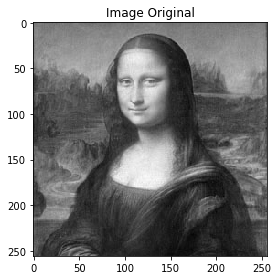

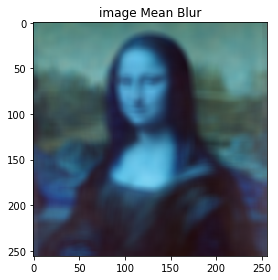

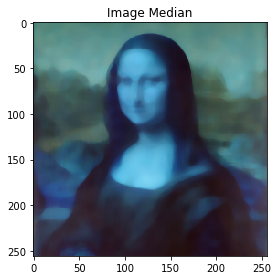

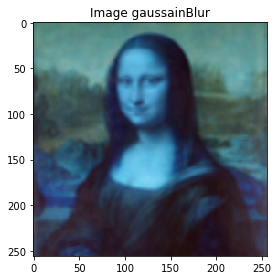

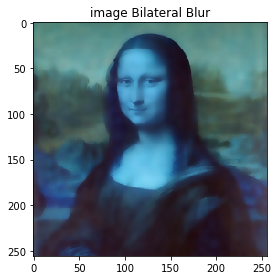

In [64]:
import cv2
import numpy as np
#Read images for different blurring purposes
image_Original = cv2.imread("ImageProcessingImage/images/monalisa.jpg")[:,:,1]
image_MeanBlur = cv2.imread("ImageProcessingImage/images/monalisa.jpg") 
image_MedianBlur = cv2.imread("ImageProcessingImage/images/monalisa.jpg") 
image_GaussianBlur = cv2.imread("ImageProcessingImage/images/monalisa.jpg") 
image_BilateralBlur = cv2.imread("ImageProcessingImage/images/monalisa.jpg")
#Blur images 
image_MedianBlur=cv2.medianBlur(image_MedianBlur,9)
image_GaussianBlur=cv2.GaussianBlur(image_GaussianBlur,(5,5),12) 
image_meanBlur=cv2.blur(image_MeanBlur,(9,9))
image_BilateralBlur=cv2.bilateralFilter(image_BilateralBlur,9, 100,75)
#Show images
figure(0)
title("Image Original")
io.imshow(image_Original)
figure(1) 
title("image Mean Blur")
io.imshow(image_meanBlur)
figure(2)
title("Image Median")
io.imshow(image_MedianBlur)
figure(3)
title("Image gaussainBlur")
io.imshow(image_GaussianBlur)
figure(4) 
title("image Bilateral Blur")
io.imshow(image_BilateralBlur)

# Tranformation operations


## log transformation

In [65]:
import cv2
import numpy as np

# Open the image.
img = cv2.imread('rot.jpg')[: ,:,1]

# Apply log transform.
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)

# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)

# Save the output.
cv2.imwrite('log_transformed.jpg', log_transformed)


True

## power (gamma) transformation

In [66]:
import cv2
import numpy as np

# Open the image.
img = cv2.imread('rot.jpg')

# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
	
	# Apply gamma correction.
	gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

	# Save edited images.
	cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)


## linear transformation

In [67]:
import cv2
import numpy as np

# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
	if (0 <= pix and pix <= r1):
		return (s1 / r1)*pix
	elif (r1 < pix and pix <= r2):
		return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
	else:
		return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Open the image.
img = cv2.imread('rot.jpg')

# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)


True